In [20]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [26]:
df = pd.read_csv('dataset/heart.csv')

In [27]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [31]:
col_string = df.select_dtypes(include=['object']).columns
df[col_string] = df[col_string].astype('string')

In [32]:
col_string = df.select_dtypes("string").columns.to_list()

In [33]:
num_col=df.columns.to_list()
#print(num_col)
for col in col_string:
    num_col.remove(col)
num_col.remove("HeartDisease")

In [34]:
col_string

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [35]:
num_col

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [36]:
df = df.apply(LabelEncoder().fit_transform)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop("HeartDisease", axis=1)  # Features
y = df["HeartDisease"]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.head())
print(y_train.head())

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
795   14    1              2         22           98          1           1   
25     8    1              2         31           67          0           1   
84    28    1              0         49           71          1           1   
10     9    0              2         31           69          0           1   
344   23    1              0         22            0          1           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
795    116               0       18         0  
25     104               0       10         2  
84      51               1       20         1  
10      68               0       10         2  
344     30               0       10         1  
795    0
25     0
84     1
10     0
344    1
Name: HeartDisease, dtype: int64


In [40]:
X_test

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
668,35,0,1,41,53,0,1,105,0,10,2
30,25,1,2,46,218,0,1,56,0,10,1
377,37,1,0,55,0,1,2,48,0,22,1
535,28,1,0,31,0,0,0,48,1,20,1
807,26,1,1,13,165,0,1,82,0,10,2
793,39,1,0,26,112,1,1,89,0,12,1
363,28,1,0,22,0,0,2,74,0,10,1
583,41,1,2,43,129,0,0,52,0,13,2
165,18,1,3,41,130,1,1,101,0,30,1
483,30,1,0,22,0,0,0,32,1,25,0


In [41]:
y_test

668    0
30     1
377    1
535    1
807    0
793    1
363    1
583    0
165    1
483    1
773    0
551    0
768    0
694    0
718    1
312    1
713    0
309    1
846    1
616    0
355    1
39     0
231    0
822    0
603    1
63     1
192    0
481    1
866    0
67     0
72     1
655    1
679    0
139    1
732    1
824    0
174    1
896    0
499    1
70     1
716    1
23     1
541    1
799    0
672    0
826    0
250    1
752    1
350    1
758    0
759    1
107    0
445    1
141    1
650    1
544    0
110    0
593    1
519    1
907    1
675    0
280    0
136    0
422    1
208    0
442    1
86     1
44     1
531    1
913    1
634    0
290    0
338    1
357    1
292    0
227    1
591    0
425    1
789    0
522    1
861    1
352    1
493    1
60     0
598    1
722    1
426    0
468    1
66     0
332    0
375    1
381    1
557    1
260    0
235    0
218    0
382    1
439    0
762    1
305    1
137    0
538    1
76     1
794    0
436    1
266    1
215    0
334    1
523    1
507    0
209    1
4

Accuracy: 0.8641304347826086
ROC AUC: 0.9320305862361937


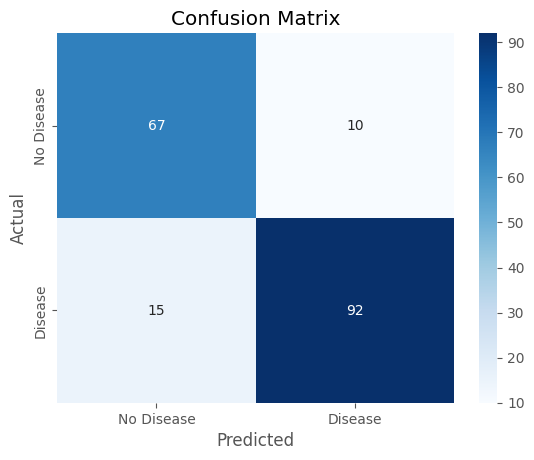

In [52]:
import joblib
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model_path = 'adaboost_best_model_fold_3.pkl'
best_model = joblib.load(model_path)

y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  


acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {acc}")
print(f"ROC AUC: {auc}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [53]:
results_df = pd.DataFrame({
    'True Values (y_true)': y_test,
    'Predicted Values (y_pred)': y_pred
})
print("\nTrue vs Predicted Values:")
print(results_df)


True vs Predicted Values:
     True Values (y_true)  Predicted Values (y_pred)
668                     0                          0
30                      1                          0
377                     1                          1
535                     1                          1
807                     0                          0
793                     1                          1
363                     1                          1
583                     0                          0
165                     1                          1
483                     1                          1
773                     0                          1
551                     0                          0
768                     0                          1
694                     0                          0
718                     1                          1
312                     1                          1
713                     0                          0
309                

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, make_scorer
roc_auc_scorer = make_scorer(roc_auc_score)

cv_accuracy = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')  
cv_roc_auc = cross_val_score(best_model, X, y, cv=5, scoring=roc_auc_scorer) 
print(f"Cross-validated Accuracy: {cv_accuracy.mean():.4f} ± {cv_accuracy.std():.4f}")
print(f"Cross-validated ROC AUC: {cv_roc_auc.mean():.4f} ± {cv_roc_auc.std():.4f}")

print("\nAccuracy for each fold:")
print(cv_accuracy)
print("\nROC AUC for each fold:")
print(cv_roc_auc)

Cross-validated Accuracy: 0.8278 ± 0.0486
Cross-validated ROC AUC: 0.8270 ± 0.0484

Accuracy for each fold:
[0.88043478 0.83152174 0.83152174 0.8579235  0.73770492]

ROC AUC for each fold:
[0.88378766 0.83967001 0.81336681 0.85637527 0.74172905]
